In [2]:
import numpy as np
n=2
n=(2*n,2*n,2*n)
nn=np.array(n)
nm = [];  nm.append(np.copy(nn))

In [21]:
grid=np.random.random(size=n)

In [22]:
gridtest=grid[::2,::2,::2]
gridtest.shape, gridtest

((2, 2, 2), array([[[0.18696264, 0.76979125],
         [0.18066043, 0.76617014]],
 
        [[0.87867704, 0.40158723],
         [0.91124306, 0.28772463]]]))

In [23]:
f_coarse=gridtest
n = np.array(np.shape(f_coarse))
n = tuple([2*x for x in n])
f_fine=np.zeros(n)
f_fine[::2,::2,::2]=f_coarse
f_fine1=np.copy(f_fine)
# f_fine[::2]=np.where(f_fine==0, 1/2*(np.roll(f_fine,1, axis=0)+ np.roll(f_fine,-1, axis=0)))

In [5]:
f_fine1[::2, ::2, :]=np.where(f_fine1[::2, ::2, :]==0,\
         1/2*(np.roll(f_fine1[::2, ::2, :],1, axis=2)+ np.roll(f_fine1[::2, ::2, :],-1, axis=2)), f_fine1[::2, ::2, :])
f_fine1[::2, :, :]=np.where(f_fine1[::2, :, :]==0,\
         1/2*(np.roll(f_fine1[::2, :, :],1, axis=1)+ np.roll(f_fine1[::2, :, :],-1, axis=1)), f_fine1[::2, :, :])
f_fine1=np.where(f_fine1[:, :, :]==0,\
         1/2*(np.roll(f_fine1[:, :, :],1, axis=0)+ np.roll(f_fine1[:, :, :],-1, axis=0)), f_fine1[:, :, :])

In [6]:
f_fine1, f_coarse

(array([[[0.26027459, 0.45854251, 0.65681043, 0.45854251],
         [0.20498047, 0.38138888, 0.55779728, 0.38138888],
         [0.14968635, 0.30423524, 0.45878414, 0.30423524],
         [0.20498047, 0.38138888, 0.55779728, 0.38138888]],
 
        [[0.19284454, 0.39624093, 0.59963733, 0.39624093],
         [0.19402523, 0.39532794, 0.59663065, 0.39532794],
         [0.19520592, 0.39441495, 0.59362397, 0.39441495],
         [0.19402523, 0.39532794, 0.59663065, 0.39532794]],
 
        [[0.12541449, 0.33393935, 0.54246422, 0.33393935],
         [0.18306999, 0.409267  , 0.63546401, 0.409267  ],
         [0.24072549, 0.48459465, 0.72846381, 0.48459465],
         [0.18306999, 0.409267  , 0.63546401, 0.409267  ]],
 
        [[0.19284454, 0.39624093, 0.59963733, 0.39624093],
         [0.19402523, 0.39532794, 0.59663065, 0.39532794],
         [0.19520592, 0.39441495, 0.59362397, 0.39441495],
         [0.19402523, 0.39532794, 0.59663065, 0.39532794]]]),
 array([[[0.26027459, 0.65681043],
         

In [4]:
import matplotlib.pyplot as plt
# plt.imshow(f_fine1[0])

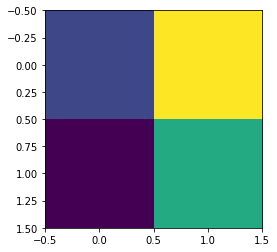

In [8]:
plt.imshow(f_coarse[0])

In [9]:
f_fine1

array([[[0.26027459, 0.45854251, 0.65681043, 0.45854251],
        [0.20498047, 0.38138888, 0.55779728, 0.38138888],
        [0.14968635, 0.30423524, 0.45878414, 0.30423524],
        [0.20498047, 0.38138888, 0.55779728, 0.38138888]],

       [[0.19284454, 0.39624093, 0.59963733, 0.39624093],
        [0.19402523, 0.39532794, 0.59663065, 0.39532794],
        [0.19520592, 0.39441495, 0.59362397, 0.39441495],
        [0.19402523, 0.39532794, 0.59663065, 0.39532794]],

       [[0.12541449, 0.33393935, 0.54246422, 0.33393935],
        [0.18306999, 0.409267  , 0.63546401, 0.409267  ],
        [0.24072549, 0.48459465, 0.72846381, 0.48459465],
        [0.18306999, 0.409267  , 0.63546401, 0.409267  ]],

       [[0.19284454, 0.39624093, 0.59963733, 0.39624093],
        [0.19402523, 0.39532794, 0.59663065, 0.39532794],
        [0.19520592, 0.39441495, 0.59362397, 0.39441495],
        [0.19402523, 0.39532794, 0.59663065, 0.39532794]]])

In [10]:
f_fine1[::2, ::2, :]

array([[[0.26027459, 0.45854251, 0.65681043, 0.45854251],
        [0.14968635, 0.30423524, 0.45878414, 0.30423524]],

       [[0.12541449, 0.33393935, 0.54246422, 0.33393935],
        [0.24072549, 0.48459465, 0.72846381, 0.48459465]]])

In [11]:
def prolong(f_coarse,level):
    """ prolong solution to finer level by copy for every second point and average for every second point """
    if level==0:
        ...
    if level>0:
        n = np.array(np.shape(f_coarse))
        n = tuple([2*x for x in n])
        f_fine=np.zeros(n)
        f_fine[::2,::2,::2]=f_coarse
        f_fine=np.where(f_fine==0, 1/6*(np.roll(f_fine,1, axis=0)+ np.roll(f_fine,-1, axis=0)+\
                                         np.roll(f_fine,1, axis=1)+ np.roll(f_fine,-1, axis=1)+\
                                         np.roll(f_fine,1, axis=2)+ np.roll(f_fine,-1, axis=2)),f_fine)
    return f_fine
prolong(gridtest, 2)

array([[[0.26027459, 0.1528475 , 0.65681043, 0.1528475 ],
        [0.06832682, 0.        , 0.18593243, 0.        ],
        [0.14968635, 0.10141175, 0.45878414, 0.10141175],
        [0.06832682, 0.        , 0.18593243, 0.        ]],

       [[0.06428151, 0.        , 0.19987911, 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.06506864, 0.        , 0.19787466, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.12541449, 0.11131312, 0.54246422, 0.11131312],
        [0.06102333, 0.        , 0.21182134, 0.        ],
        [0.24072549, 0.16153155, 0.72846381, 0.16153155],
        [0.06102333, 0.        , 0.21182134, 0.        ]],

       [[0.06428151, 0.        , 0.19987911, 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.06506864, 0.        , 0.19787466, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]])

In [38]:
def prolong(f_coarse,level):
        """ prolong solution to finer level by copy for every second point and average for every second point """
        if level==0:
            plt.imshow(f_coarse)
            print('Reached finest level')
        if level>0:
            n = np.array(np.shape(f_coarse))
            n = tuple([2*x for x in n])
            f_fine=np.zeros(n)
            f_fine[::2,::2,::2]=f_coarse
            f_fine[::2, ::2, :]=np.where(f_fine[::2, ::2, :]==0,\
                     1/2*(np.roll(f_fine[::2, ::2, :],1, axis=2)+ np.roll(f_fine[::2, ::2, :],-1, axis=2)), f_fine[::2, ::2, :])
            f_fine[::2, :, :]=np.where(f_fine[::2, :, :]==0,\
                     1/2*(np.roll(f_fine[::2, :, :],1, axis=1)+ np.roll(f_fine[::2, :, :],-1, axis=1)), f_fine[::2, :, :])
            f_fine=np.where(f_fine[:, :, :]==0,\
                     1/2*(np.roll(f_fine[:, :, :],1, axis=0)+ np.roll(f_fine[:, :, :],-1, axis=0)), f_fine[:, :, :])
        return f_fine

In [51]:
f_fine1=np.random.random(size=n)

(512, 512, 512)


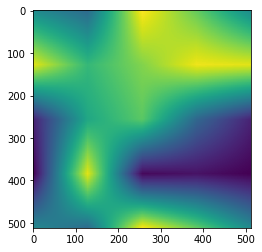

In [61]:
f_fine1=prolong(f_fine1, 2)
print(f_fine1.shape)
plt.imshow(f_fine1[:,:,0])

In [55]:
f_fine1[2::2].shape

(3, 8, 8)